# Import required packges

In [434]:
import pandas as pd




# Import the orders
## and Calculate the revenue

In [435]:
orders = pd.read_csv('orders.csv')
orders['revenue'] = orders['orderAmount'] * orders['articlePrice']
orders

,orderID,orderDate,customerID,articleName,articlePrice,orderAmount,revenue
0,1,2020-01-01,912,Product #019,8.39,5,41.95
1,1,2020-01-01,912,Product #078,22.68,4,90.72
2,2,2020-01-01,46,Product #010,2.06,7,14.42
3,2,2020-01-01,46,Product #022,41.92,6,251.52
4,2,2020-01-01,46,Product #097,62.93,6,377.58
...,...,...,...,...,...,...,...
48807,9997,2020-06-30,175,Product #057,37.85,5,189.25
48808,9997,2020-06-30,175,Product #064,63.81,1,63.81
48809,9998,2020-06-30,56,Product #011,32.90,11,361.90
48810,9999,2020-06-30,178,Product #043,68.13,8,545.04


# Group the revenue per customer

In [436]:
customers = orders.groupby(['customerID'])['revenue'].sum().reset_index()
customers

,customerID,revenue
0,1,113005.19
1,2,92927.35
2,3,116185.57
3,4,209188.97
4,5,161098.03
...,...,...
990,996,15927.83
991,997,8411.16
992,998,5917.52
993,999,14076.64


# Caluclate the percentage of the revenue per customer

In [437]:
total_revenue = sum(customers['revenue'])
customers['percentage'] = customers['revenue'] / total_revenue
customers

,customerID,revenue,percentage
0,1,113005.19,0.002322
1,2,92927.35,0.001909
2,3,116185.57,0.002387
3,4,209188.97,0.004298
4,5,161098.03,0.003310
...,...,...,...
990,996,15927.83,0.000327
991,997,8411.16,0.000173
992,998,5917.52,0.000122
993,999,14076.64,0.000289


# Sort the Customers by percentage desc

In [438]:
customers = customers.sort_values(['revenue'], ascending=False)
customers

,customerID,revenue,percentage
42,43,742299.47,0.015253
29,30,605485.25,0.012441
25,26,499334.02,0.010260
27,28,487596.41,0.010019
52,53,437209.49,0.008984
...,...,...,...
980,986,941.18,0.000019
740,741,884.98,0.000018
525,526,694.88,0.000014
882,885,578.92,0.000012


# Cum-sum the percentage

In [439]:
customers['cum_sum'] = customers['percentage'].cumsum()
customers

,customerID,revenue,percentage,cum_sum
42,43,742299.47,0.015253,0.015253
29,30,605485.25,0.012441,0.027694
25,26,499334.02,0.010260,0.037955
27,28,487596.41,0.010019,0.047974
52,53,437209.49,0.008984,0.056957
...,...,...,...,...
980,986,941.18,0.000019,0.999945
740,741,884.98,0.000018,0.999964
525,526,694.88,0.000014,0.999978
882,885,578.92,0.000012,0.999990


# Labeling the customers

In [440]:
customers['abc'] = None
for index, row in customers.iterrows():
    label = None
    if row['cum_sum'] <= 0.20:
        label = 'A'
    elif row['cum_sum'] <= 0.80:
        label = 'B'
    else:
        label = 'C'
    customers.loc[index, 'abc'] = label
customers

,customerID,revenue,percentage,cum_sum,abc
42,43,742299.47,0.015253,0.015253,A
29,30,605485.25,0.012441,0.027694,A
25,26,499334.02,0.010260,0.037955,A
27,28,487596.41,0.010019,0.047974,A
52,53,437209.49,0.008984,0.056957,A
...,...,...,...,...,...
980,986,941.18,0.000019,0.999945,C
740,741,884.98,0.000018,0.999964,C
525,526,694.88,0.000014,0.999978,C
882,885,578.92,0.000012,0.999990,C


# Check the result in the graph
1. Import the packages
2. add order for the customers (1-n)
3. Add Colors for the abc-groups

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
customers['orderNo'] = range(1, customers.shape[0]+1, 1)


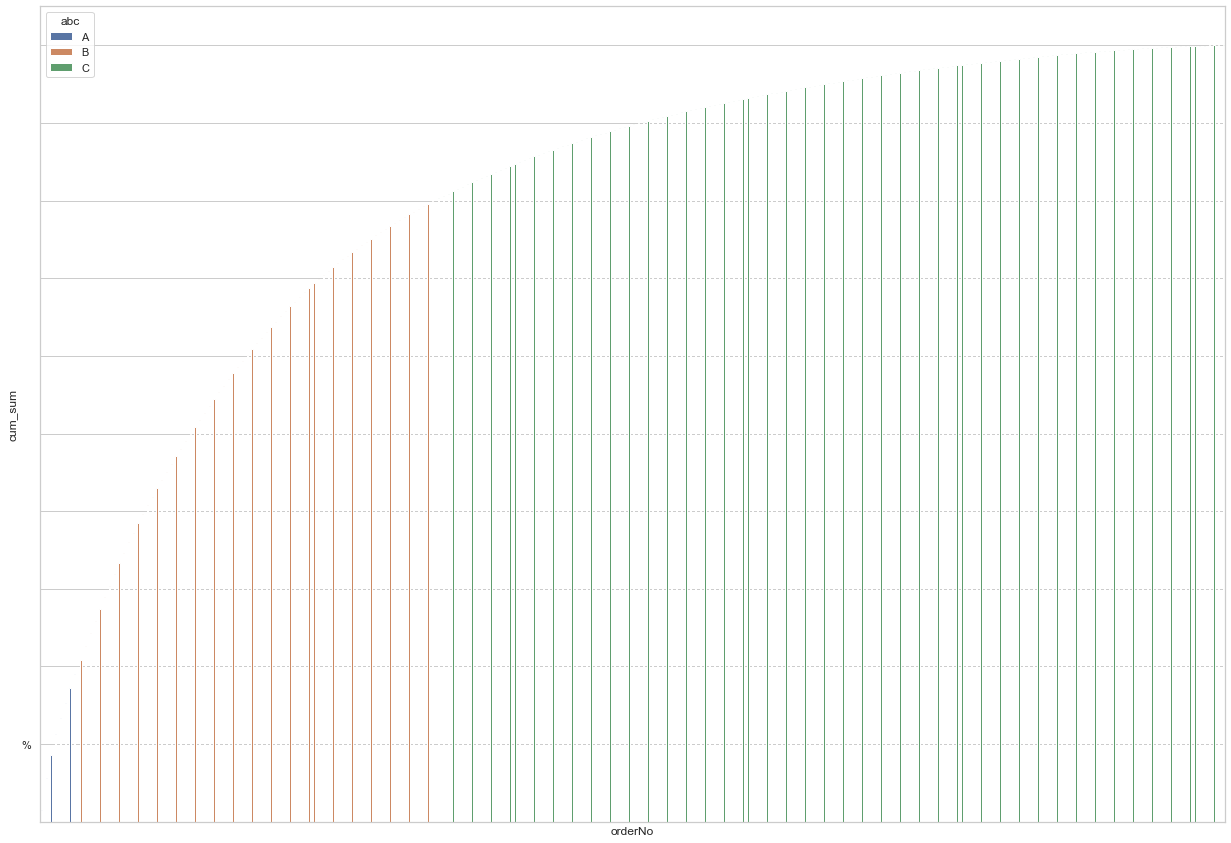

In [443]:
dims = (21.22, 15)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(ax=ax, x='orderNo', y='cum_sum', data=customers.iloc[::4, :], hue='abc', linewidth=1)
plt.xticks([], '')
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], ' %')
plt.show()

In [444]:
customers.to_csv('customers.csv', index=False)

,customerID,revenue,percentage,cum_sum,abc,orderNo
42,43,742299.47,0.015253,0.015253,A,1
29,30,605485.25,0.012441,0.027694,A,2
25,26,499334.02,0.010260,0.037955,A,3
27,28,487596.41,0.010019,0.047974,A,4
52,53,437209.49,0.008984,0.056957,A,5
116,117,368432.46,0.007571,0.064528,A,6
67,68,362136.74,0.007441,0.071969,A,7
49,50,353988.05,0.007274,0.079243,A,8
31,32,346642.77,0.007123,0.086366,A,9
215,216,338330.78,0.006952,0.093318,A,10
